In [5]:
import numpy as np
import pandas as pd
import low_rank_models as lrm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
errorMtx = pd.read_csv('error_matrix.csv', index_col=0).values

In [6]:
def quadratic_loss(A, rank):
    X,Y = lrm.pca(A, rank)
    A_hat = np.dot(np.matrix.transpose(X), Y)
    mse = np.linalg.norm(A_hat - A)/(A.shape[0]*A.shape[1])
    return mse

In [22]:
x = np.arange(1, 39, 1)
y1 = np.empty(len(x))
y2 = np.empty(len(x))
y3 = np.empty(len(x))
for i in range(len(x)):
    y1[i] = reconstruction_error(metafeatures, x[i])
    y2[i] = reconstruction_error(errorMtx, x[i])
    y3[i] = reconstruction_error(concat, x[i])

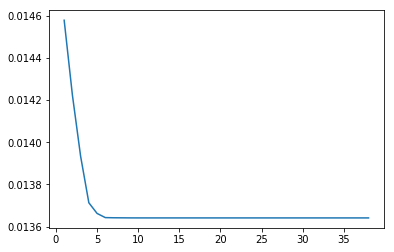

In [25]:
plt.plot(x, y1, label='metafeatures');

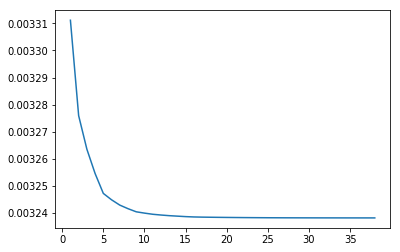

In [26]:
plt.plot(x, y2, label='error matrix');

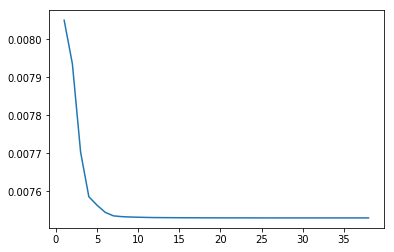

In [27]:
plt.plot(x, y3, label='error matrix & metafeatures');

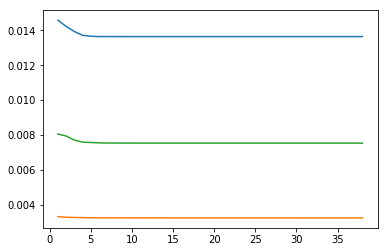

In [28]:
plt.plot(x, y1, label='metafeatures');
plt.plot(x, y2, label='error matrix');
plt.plot(x, y3, label='error matrix & metafeatures');